<a href="https://colab.research.google.com/github/audrb1999/Python_image/blob/main/git_hub9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***10. KNN 숫자 인식 예제***

In [1]:
from google.colab import files
uploaded = files.upload()

Saving digits.png to digits.png


위 이미지는 빼곡하게 많은 숫자사진이 들어가있습니다.

0~9까지 각각 500장씩 총 5000장의 사진이 있고

이미지는 20x20 픽셀로 구성되어 있습니다.

즉 이 전체사진이 20x20이 되도록 나눈다면 5천 개의 데이터를 얻는 것입니다.

In [2]:

import cv2
import numpy as np

img = cv2.imread('digits.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(gray.shape) 

# (20 * 50) , (20 * 100) 상태의 픽셀로 존재함 그걸 20x20으로 바꿔야하니
# 세로로 50, 가로로 100으로 나누는 것
# 세로를 50줄을 나누고 그것들을 각각의 줄마다 가로로 100줄씩 나누는 것 > 총 5000개의 사진을 나눔
cells = [np.hsplit(row, 100) for row in np.vsplit(gray, 50)]
x = np.array(cells)
print(x.shape)

# 각 (20 X 20) 크기의 사진을 한 줄(1 X 400)으로 바꿉니다. FC 계층을 바로 거치나봄 flatten 사용
# 머신러닝에서 입력으로 데이터를 넣을 때는 한 줄의 벡터로 넣어야함
# 그 과정에서 사라지는 정보를 없애기 위한 것들이 합성곱 계층 같은 것들

train = x[:, :].reshape(-1, 400).astype(np.float32)

# x 모든 원소에 대해서 (1, 400)으로 바꿔줌
# reshape에 -1이 들어가면 reshape(-1, 400) > 열을 400으로 하고 남은 나머지를 전부다 쓰는 것!
# (50, 100, 20, 20)을 (?, 400)으로 하니 남은 것들은 50, 100 그걸 곱해서 결과가 (5000, 400) 나옵니다.

print(train.shape)

# 라벨링 작업
# 0이 500개, 1이 500개, ... 로 총 5,000개가 들어가는 (1 x 5000) 배열을 만듭니다.
# 0~9 까지 이미지 갯수에 맞게 500개씩 생성
k = np.arange(10)

# 각각 500개씩 생성해줬지만 그냥 1차원 벡터임으로
# np.newaxis으로 차원을 늘려줌
# 행은 방금 생성시킨 5000개에 데이터로 열을 확장시켜서 1
train_labels = np.repeat(k, 500)[:, np.newaxis]
print(train_labels.shape)

# 학습데이터로 저장
np.savez("trained.npz", train=train, train_labels=train_labels)



(1000, 2000)
(50, 100, 20, 20)
(5000, 400)
(5000, 1)


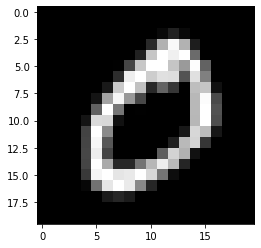

True

In [3]:
import matplotlib.pyplot as plt

# 다음과 같이 하나씩 글자를 출력할 수 있습니다.
plt.imshow(cv2.cvtColor(x[0, 0], cv2.COLOR_GRAY2RGB))
plt.show()

# 다음과 같이 하나씩 글자를 저장할 수 있습니다.
cv2.imwrite('test_0.png', x[0, 0])
cv2.imwrite('test_1.png', x[5, 0])
cv2.imwrite('test_2.png', x[10, 0])
cv2.imwrite('test_3.png', x[15, 0])
cv2.imwrite('test_4.png', x[20, 0])
cv2.imwrite('test_5.png', x[25, 0])
cv2.imwrite('test_6.png', x[30, 0])
cv2.imwrite('test_7.png', x[35, 0])
cv2.imwrite('test_8.png', x[40, 0])
cv2.imwrite('test_9.png', x[45, 0])
